In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
#Loading an excel file
df=pd.read_excel('CH.xlsx')

In [3]:
df.head()

,ID,DATA_RECEIVED_MOMENT,CH ID FAN2 Vibration Fan NDE X-axis
0,7258372,2018-07-19 16:30:00,0.679
1,7258323,2018-07-19 16:35:00,0.676
2,7258274,2018-07-19 16:40:00,0.672
3,7258225,2018-07-19 16:50:00,0.676
4,7258176,2018-07-19 16:55:00,0.672


In [4]:
df.shape

(139335, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139335 entries, 0 to 139334
Data columns (total 3 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ID                                   139335 non-null  int64         
 1   DATA_RECEIVED_MOMENT                 139335 non-null  datetime64[ns]
 2   CH ID FAN2 Vibration Fan NDE X-axis  139335 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.2 MB


In [6]:
df.describe()

,ID,CH ID FAN2 Vibration Fan NDE X-axis
count,1.393350e+05,139335.000000
mean,3.741060e+06,1.657858
std,2.089899e+06,2.206866
min,2.300000e+01,0.000000
25%,1.950696e+06,0.480000
50%,3.811980e+06,0.525000
75%,5.551514e+06,0.615000
max,7.258372e+06,8.872000


In [7]:
#checking if there is NA value or not
df.isnull().sum()

ID                                     0
DATA_RECEIVED_MOMENT                   0
CH ID FAN2 Vibration Fan NDE X-axis    0
dtype: int64

In [8]:
# Dropping the ID column
df=df.drop(['ID'], axis=1)

In [9]:
df.head()

,DATA_RECEIVED_MOMENT,CH ID FAN2 Vibration Fan NDE X-axis
0,2018-07-19 16:30:00,0.679
1,2018-07-19 16:35:00,0.676
2,2018-07-19 16:40:00,0.672
3,2018-07-19 16:50:00,0.676
4,2018-07-19 16:55:00,0.672


In [10]:
X = df[['DATA_RECEIVED_MOMENT']]
y = df['CH ID FAN2 Vibration Fan NDE X-axis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)

In [13]:
z=rf.fit(X_train, y_train)
z

RandomForestRegressor(random_state=42)

In [14]:
y_pred = rf.predict(X_test)

In [15]:
y_pred

array([4.20751   , 6.02389   , 0.544634  , ..., 0.51577733, 0.42592   ,
       0.63091   ])

In [16]:
from sklearn.metrics import r2_score

# Calculate R-squared value for the predictions
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print(f"R-squared value: {r2}")

R-squared value: 0.9943873308235832


In [17]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error for the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f"Mean squared error: {mse}")

Mean squared error: 0.027292224675556538


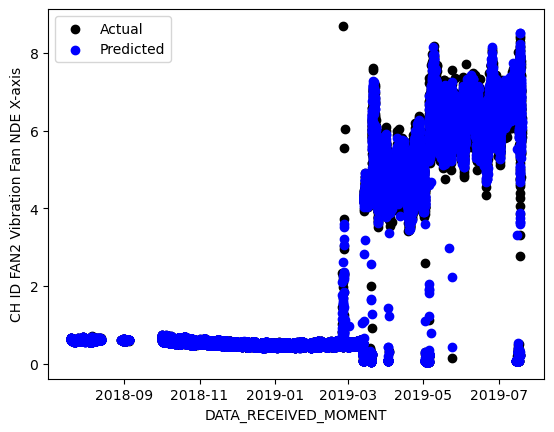

In [18]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')

# Add axis labels and a legend
plt.xlabel('DATA_RECEIVED_MOMENT')
plt.ylabel('CH ID FAN2 Vibration Fan NDE X-axis')
plt.legend()

# Show the plot
plt.show()